<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [4]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 133kB 11.4MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 35.3MB/s 
     |████████████████████████████████| 225kB 39.9MB/s 
     |████████████████████████████████| 768kB 36.9MB/s 
     |████████████████████████████████| 194kB 38.3MB/s 
     |████████████████████████████████| 51kB 20.6MB/s 
     |████████████████████████████████| 737kB 19.4MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=8f08691a7048e3cb4091eef03b3c9d0c6bfe172623042982ee66cc91aa061432
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=843c2b4a0aab627266f5bfceef4e3861c1313462f

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [7]:
# y is what we want to predict
y_train = train_labels.status_group
y_train.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [8]:
# 54% is our baseline...?

majority_class = y_train.mode()[0]
majority_class

'functional'

In [9]:
y_pred = [majority_class] * len(y_train)
len(y_pred)

59400

In [10]:
# Accuracy of majority class baseline = freq of majority class
# We can cross-check this...
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.543080808080808

In [0]:
# Why start with a baseline? A baseline will take you less than 1/10th 
# of the time, and could provide up to 90% of the results.

In [12]:
# 3-way holdout method (train/validation/test)
# OR cross-validation with independent test set


# We can split by time or randomly
from sklearn.model_selection import train_test_split
X_train = train_features
y_train = train_labels.status_group

X_train.shape, y_train.shape

((59400, 40), (59400,))

In [13]:
X_train, X_val, y_train, y_val =  train_test_split(
    X_train, y_train, train_size = 0.8, test_size = 0.20, 
    stratify = y_train, random_state = 42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [14]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [15]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [16]:
# We can only work with numerical data for now
X_train_numeric = X_train.select_dtypes('number')
X_train_numeric.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
43360,72938,0.0,0,33.542898,-9.174777,0,12,4,0,0
7263,65358,500.0,2049,34.665760,-9.308548,0,11,4,175,2008
2486,469,25.0,290,38.238568,-6.179919,0,6,1,2300,2010
313,1298,0.0,0,30.716727,-1.289055,0,18,1,0,0
52726,27001,0.0,0,35.389331,-6.399942,0,1,6,0,0


In [17]:
X_val_numeric = X_val.select_dtypes('number')
X_val_numeric.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
3290,67999,0.0,0,31.509864,-1.153080,0,18,7,0,0
47666,9256,2000.0,1576,29.838600,-4.429692,0,16,2,1,1991
2538,3168,25.0,898,37.748364,-4.061791,0,3,3,420,2011
53117,19684,0.0,0,33.380346,-3.132556,0,19,4,0,0
51817,42303,0.0,548,37.648831,-6.725480,0,5,5,500,1985


In [18]:
# Check for nulls, can cause errors!

X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [19]:
# Fit LOGISTIC REGRESSION on TRAIN DATA
import sklearn
sklearn.__version__

'0.21.3'

In [20]:
# 1. Import the class
from sklearn.linear_model import LogisticRegressionCV

# 2. Instantiate it
model = LogisticRegressionCV(n_jobs = -1) # speed optimized

# 3. Fit the data
model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [21]:
# Now we can evaluate on validation data!
y_pred = model.predict(X_val_numeric)
accuracy_score(y_val, y_pred)

0.5542087542087543

In [22]:
# Alternate method
model.score(X_val_numeric, y_val)

0.5542087542087543

In [0]:
# 1% improvement from the baseline!
# This is good, we build slowly to a better model. See though
# that the baseline was already very good.

In [24]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [25]:
pd.Series(y_pred).value_counts(normalize=True)

functional        0.907997
non functional    0.092003
dtype: float64

In [26]:
# Another useful method to see probabilities
y_pred_prob = model.predict_proba(X_val_numeric)
y_pred_prob

array([[0.50228142, 0.06953975, 0.42817883],
       [0.64800609, 0.09986685, 0.25212706],
       [0.55549719, 0.07820968, 0.36629313],
       ...,
       [0.48762355, 0.08610532, 0.42627113],
       [0.63305002, 0.06597147, 0.30097851],
       [0.27332413, 0.04583417, 0.6808417 ]])

In [27]:
# Checking cardinality of categorical features
# ie. num of unique values that a feature has

X_train.describe(exclude = 'number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [28]:
# Let's focus on exploring the quantity feature
X_train.quantity.value_counts(normalize=True)

enough          0.559070
insufficient    0.255745
dry             0.103556
seasonal        0.068266
unknown         0.013363
Name: quantity, dtype: float64

In [29]:
# Recombine X_train and y_train for exploratory data analysis
train = X_train.copy()
train['status_group'] = y_train
  
train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.967689
              functional                 0.026011
              functional needs repair    0.006300
enough        functional                 0.650920
              non functional             0.276998
              functional needs repair    0.072082
insufficient  functional                 0.521106
              non functional             0.382786
              functional needs repair    0.096108
seasonal      functional                 0.580456
              non functional             0.318434
              functional needs repair    0.101110
unknown       non functional             0.713386
              functional                 0.267717
              functional needs repair    0.018898
Name: status_group, dtype: float64

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# The recombination is better viewed as a plot

# We first perform some prep work
train['functional'] = (train['status_group']=='functional').astype(int)
train[['status_group', 'functional']]

,status_group,functional
43360,functional,1
7263,functional,1
2486,functional,1
313,non functional,0
52726,functional,1
8558,functional,1
2559,functional,1
54735,functional,1
25763,non functional,0
44540,non functional,0


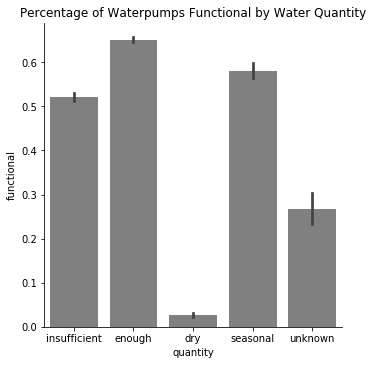

In [32]:
sns.catplot(x='quantity', y='functional', data=train, kind='bar', color='gray')
plt.title('Percentage of Waterpumps Functional by Water Quantity')
plt.show()

In [0]:
# Encoders and scalers
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [0]:
categorical_features = ['quantity']
# We don't want ids! They will be used by the model to predict (bad)
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()

features = categorical_features + numeric_features

In [35]:
# We use fit_transform on TRAIN SET
# transform on VALIDATION SET

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True) # uses name of feature
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegressionCV(n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy:', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Validation Accuracy: 0.6585016835016835


In [0]:
# Wow! Accuracy has jumped about ten percent points. We should aim to
# reach close to or above 80%...

In [37]:
# Let's recap
print(X_train.shape)
X_train[:1]

(47520, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


In [38]:
print(X_train_subset.shape)
X_train_subset[:1]

(47520, 10)


,quantity,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
43360,insufficient,0.0,0,33.542898,-9.174777,0,12,4,0,0


In [39]:
print(X_train_encoded.shape)
X_train_encoded[:1]

(47520, 14)


,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
43360,1,0,0,0,0,0.0,0,33.542898,-9.174777,0,12,4,0,0


In [40]:
# Get and plot coefficients!
model.coef_

array([[ 1.34072363e-01,  4.10951619e-01, -9.47084405e-01,
         1.40772178e-01, -8.24851579e-02,  3.53781263e-01,
         2.15674988e-01,  4.48213423e-04, -1.30243712e-01,
         2.95020953e-03, -2.52559298e-01,  1.10785996e-01,
         2.61979488e-02, -1.27220926e-01],
       [ 4.58527547e-02,  6.66605840e-04, -8.08056088e-02,
         2.73808754e-02, -2.28254790e-02, -2.64965320e-03,
        -9.57584988e-03, -9.86022379e-02,  2.84648022e-02,
        -3.34295544e-03,  1.19487147e-02, -1.70460881e-02,
         1.59968060e-03, -2.36011014e-02],
       [-1.64130501e-01, -4.11475105e-01,  1.00385326e+00,
        -1.69002588e-01,  1.10326674e-01, -4.70101009e-01,
        -2.29590761e-01,  1.68839949e-01,  1.64522504e-01,
        -1.01437135e-03,  2.25715395e-01, -8.91399128e-02,
        -2.96384544e-02,  1.30939581e-01]])

In [0]:
functional_coef = pd.Series(
    model.coef_[0],
    X_train_encoded.columns
)

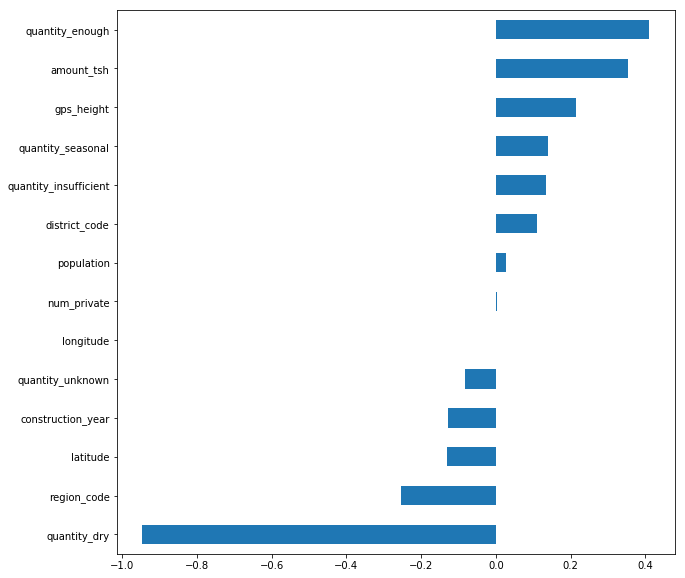

In [42]:
plt.figure(figsize=(10,10))
functional_coef.sort_values().plot.barh()

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [46]:
!head submission-01.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
# To download submission file....
# if in_colab:
#   from google.colab import files
#   files.download('submission-01.csv')

In [60]:
# Let's try to get better accuracy
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [61]:
X_train.describe(exclude = 'number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [91]:
# Recombine X_train and y_train for exploratory data analysis
train = X_train.copy()
train['status_group'] = y_train
  
train.groupby('extraction_type_class')['status_group'].value_counts(normalize=True)

extraction_type_class  status_group           
gravity                functional                 0.599403
                       non functional             0.299422
                       functional needs repair    0.101175
handpump               functional                 0.629854
                       non functional             0.310149
                       functional needs repair    0.059997
motorpump              non functional             0.574098
                       functional                 0.380892
                       functional needs repair    0.045011
other                  non functional             0.809936
                       functional                 0.159060
                       functional needs repair    0.031003
rope pump              functional                 0.657224
                       non functional             0.305949
                       functional needs repair    0.036827
submersible            functional                 0.541479
         

In [0]:
categorical_features = [
    "extraction_type_class", 
    "quantity", 
    "waterpoint_type", 
    "region",
    "extraction_type_group"
]

# We don't want ids! They will be used by the model to predict (bad)

# numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
numeric_features = []

features = categorical_features + numeric_features

In [126]:
# We use fit_transform on TRAIN SET
# transform on VALIDATION SET

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True) # uses name of feature
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegressionCV(n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy:', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Validation Accuracy: 0.7071548821548822


In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [130]:
!head submission-01.csv

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,functional


In [0]:
if in_colab:
  from google.colab import files
  files.download('submission-01.csv')